In [38]:
# Taking a look at the distribution of Data
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np

pat_data = pd.read_csv("data\kaggle_3m\data.csv")
pat_data.columns

Index(['Patient', 'RNASeqCluster', 'MethylationCluster', 'miRNACluster',
       'CNCluster', 'RPPACluster', 'OncosignCluster', 'COCCluster',
       'histological_type', 'neoplasm_histologic_grade', 'tumor_tissue_site',
       'laterality', 'tumor_location', 'gender', 'age_at_initial_pathologic',
       'race', 'ethnicity', 'death01'],
      dtype='object')

In [47]:
# extract unique label and label count
def get_num_data(csv_data, data_col):
    temp_data = csv_data[data_col].dropna().tolist()
    val, count = np.unique(temp_data, return_counts=True)

    return temp_data, val, count

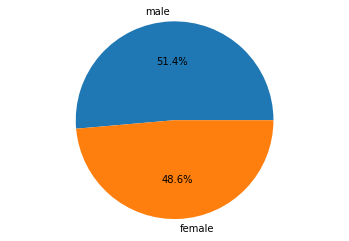

In [48]:
# gender distribution
gender, val, count = get_num_data(pat_data, 'gender')
label = ["male", "female"]
plt.pie(count, labels=label, autopct='%0.1f%%')
plt.axis('equal')
plt.show()

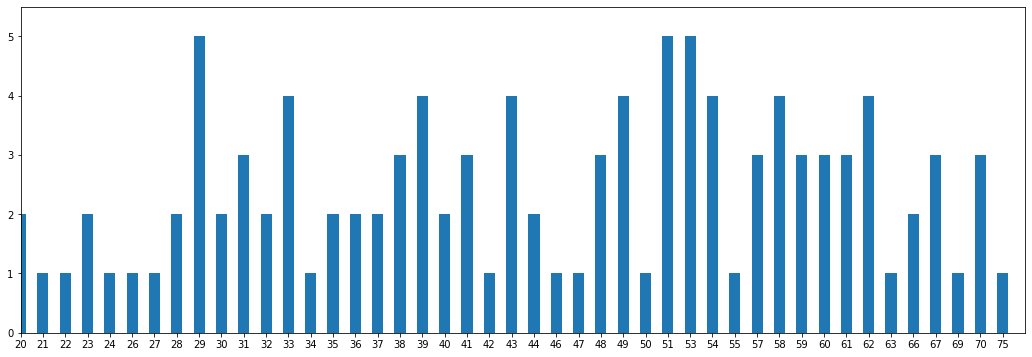

In [84]:
# distribution of age_at_initial_pathologic finding
pat_age, value, count= get_num_data(pat_data, 'age_at_initial_pathologic')
value = list(map(int, value))
plt.figure(figsize=(18,6))
plt.bar(range(len(count)), count, width=0.5)
plt.axis([0, 45, 0, 5.5])
ax = plt.subplot()
ax.set_xticks(range(len(count)))
ax.set_xticklabels(value)

plt.show()